| | |
|:----------|:----------|
| Name      | Bayesian Modeling |
| Notebook  | Metropolis and Gibbs Samplers and MCMC Metrics - Gibbs sampler |
| Author    | Joshuah Touyz, PhD |
| Version   | 0.1 |
|Last update| 01/15/21 |

In [1]:
import numpy as np
import pandas as pd
import plotnine as pn
from scipy.stats import norm
import mcmc_diagnostics as mcmc

In [2]:
# Constants
np.random.seed(123)
n_iter = 5000
burn_in = 500

# True values
# beta_vals = np.array([8,0.1,0.5])
# np.array(np.exp(xs.dot(beta_vals)))
# print('Observations {}'.format(np.round(y)))

# Inputting values
y = [5432, 3294, 4915, 2981, 5432, 3294,
     4915, 2981, 5432, 3294, 4915, 2981]
xs = np.array(
    [[1,1,1],[1,1,0],[1,0,1],[1,0,0],
     [1,1,1],[1,1,0],[1,0,1],[1,0,0],
     [1,1,1],[1,1,0],[1,0,1],[1,0,0]])


# Prior values for gamma prior
eta = 1
nu = 0.005  

# Sufficient statistics
y_times_x = xs.T.dot(y)
eta_prime = y_times_x+eta

# Parameter intialization
np.random.seed(12345)
lambdas = np.random.uniform(size = n_iter*3).reshape(n_iter,3)

In [3]:
# Gibbs sampler for Poisson regression
np.random.seed(1234)

for t in np.arange(1,n_iter):
    for j in np.arange(0,3):
        
        if j == 0:             
            lambda_1 = lambdas[t-1,1]
            lambda_2 = lambdas[t-1,2]
            lambdas_k_not_j = np.array([lambda_1,lambda_2])
        elif j == 1:
            lambda_0 = lambdas[t,0]
            lambda_2 = lambdas[t-1,2]
            lambdas_k_not_j = np.array([lambda_0,lambda_2])
        else:
            lambda_0 = lambdas[t,0]
            lambda_1 = lambdas[t,1]
            lambdas_k_not_j = np.array([lambda_0,lambda_1])
        
        # Calculating nu prime
        xs_k_not_j = np.delete(xs[xs[:,j]==1],j,1)
        nu_prime_j = nu + np.prod(lambdas_k_not_j** xs_k_not_j,1).sum()
        
        # Simulating from gamma posterior
        lambda_j =  mcmc.rgamma(eta_prime[j], nu_prime_j)        

        # Update value
        lambdas[t,j] = lambda_j
    if t == (n_iter-1):
        print('Removing burn_in')
        lambdas = lambdas[burn_in:,:]      


Removing burn_in


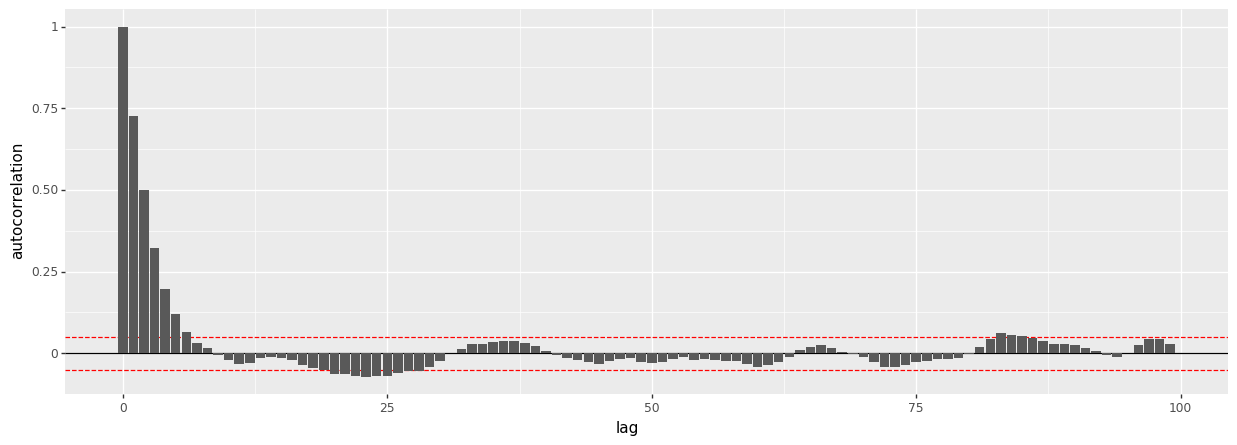

<ggplot: (380910463)>


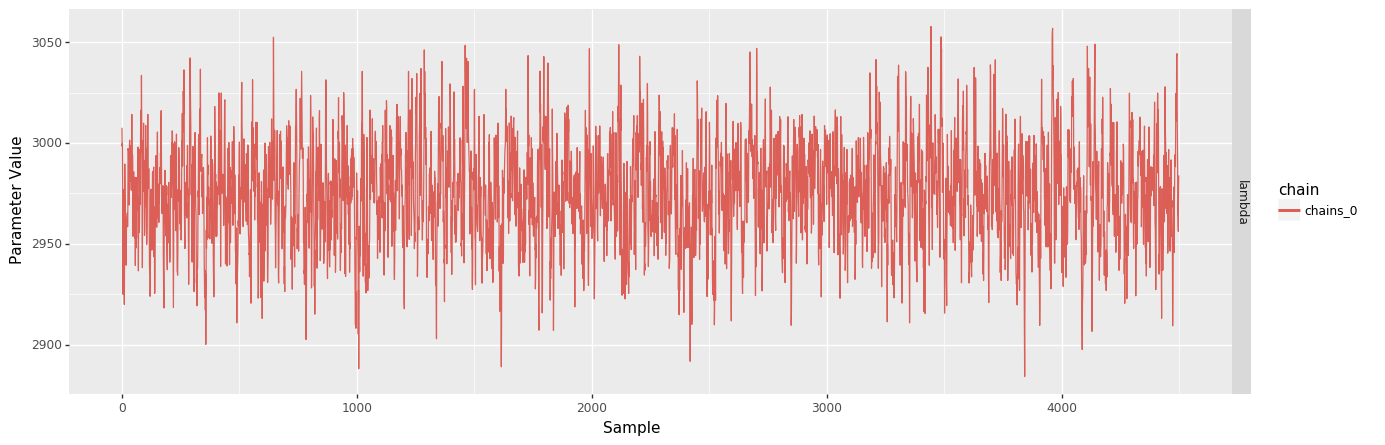

<ggplot: (-9223372036473840380)>


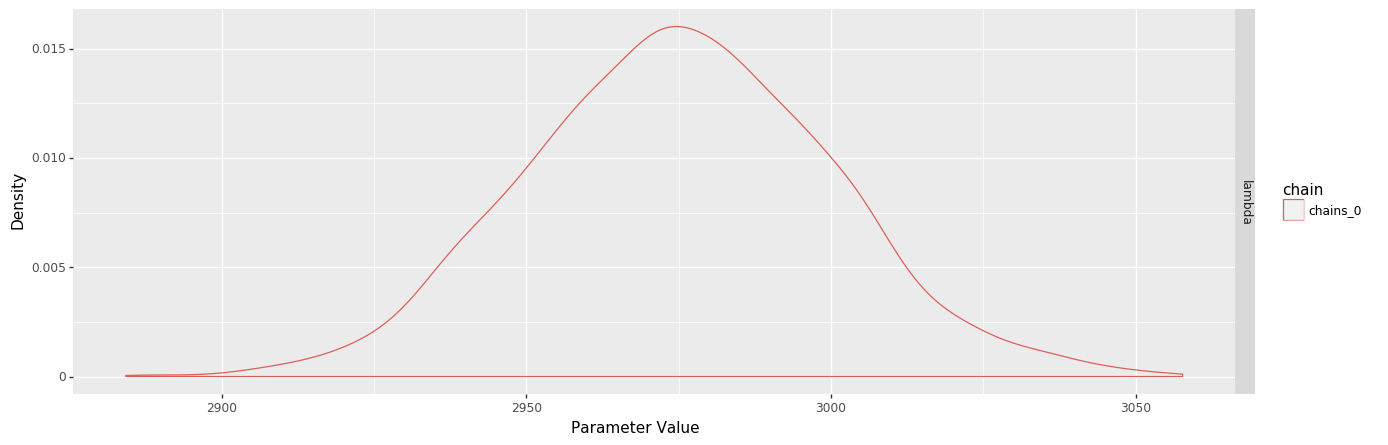

<ggplot: (-9223372036473787034)>
None
The effective sampe size across our 1 chains are 907.0
The average scale reduction (R) is nan


,mean_parameter,mode_parameter,std_dev_parameter,5_percentile,95_percentile,n_eff,R
0,2975.160318,2967.584,24.986486,2934.54095,3016.02765,907.0,NaN


In [4]:
# Diagnostics for lambda_0
mcmc.mcmc_diagnostics(lambdas[:,0].reshape(1,n_iter-burn_in), 
                      thin = 1,
                      srf_details=False,
                      plot_1_acf = True, 
                      plot_m_c_trace = True)


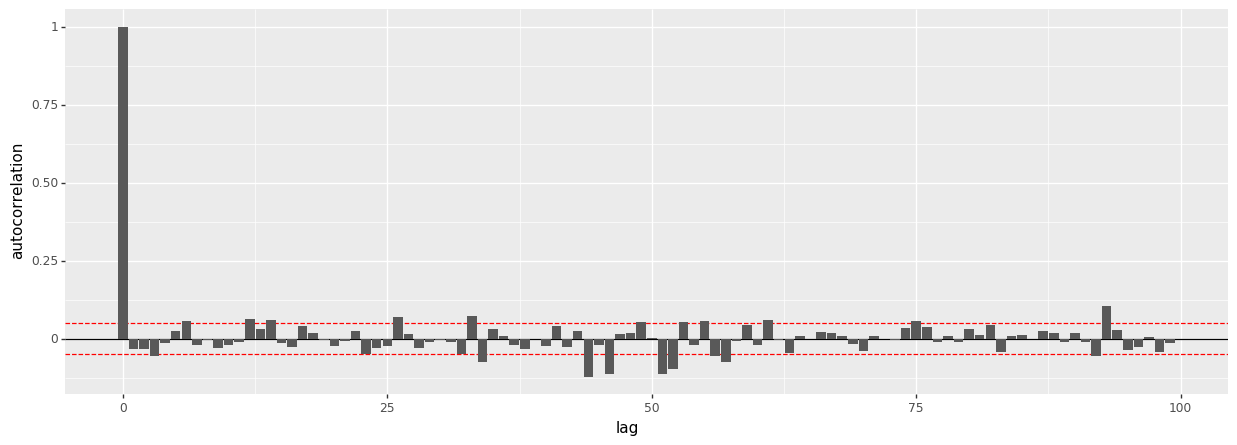

<ggplot: (417553721)>


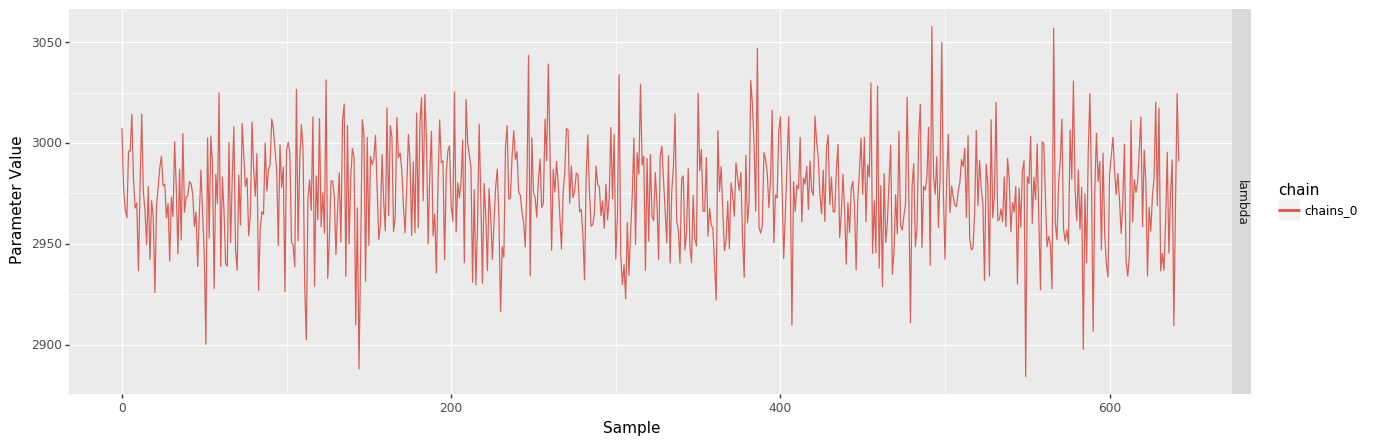

<ggplot: (-9223372036437210417)>


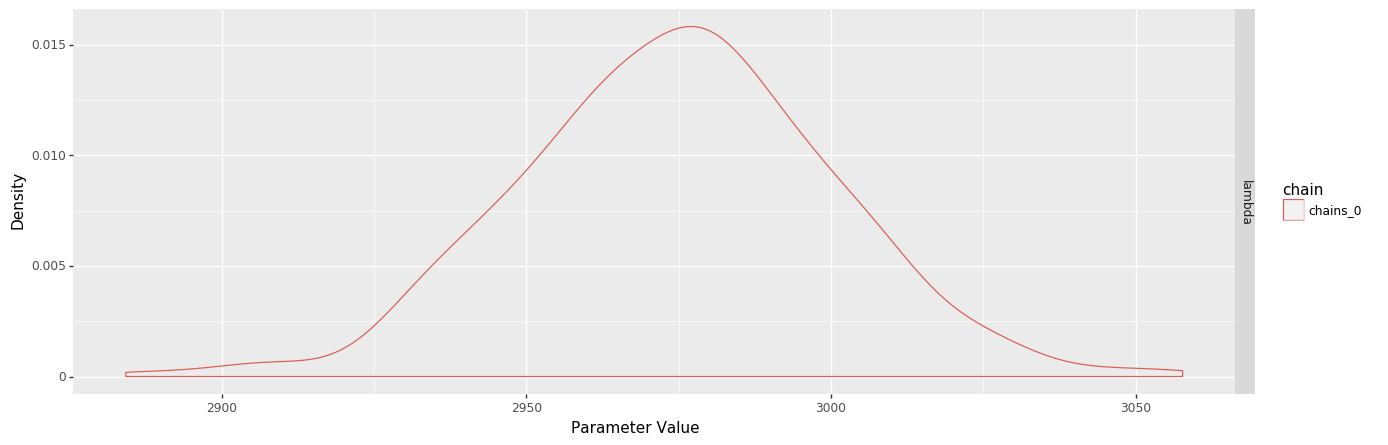

<ggplot: (-9223372036473717006)>
None
The effective sampe size across our 1 chains are 643.0
The average scale reduction (R) is nan


,mean_parameter,mode_parameter,std_dev_parameter,5_percentile,95_percentile,n_eff,R
0,2974.641342,2950.6,25.763664,2933.6434,3014.4682,643.0,NaN


In [5]:
# Diagnostics for lambda_0
mcmc.mcmc_diagnostics(lambdas[:,0].reshape(1,n_iter-burn_in), 
                      thin = 7, 
                      srf_details=False,
                      plot_1_acf = True, 
                      plot_m_c_trace = True)

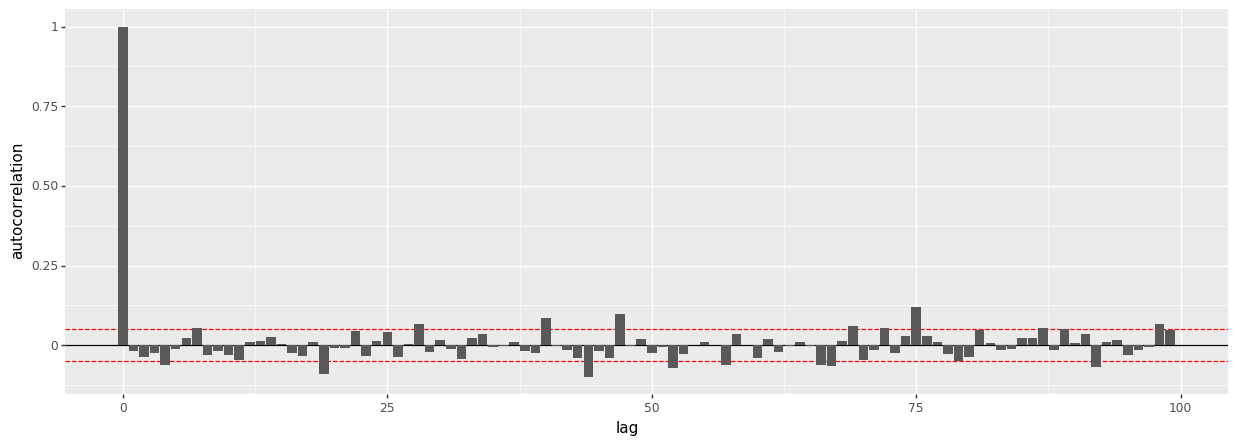

<ggplot: (417644485)>


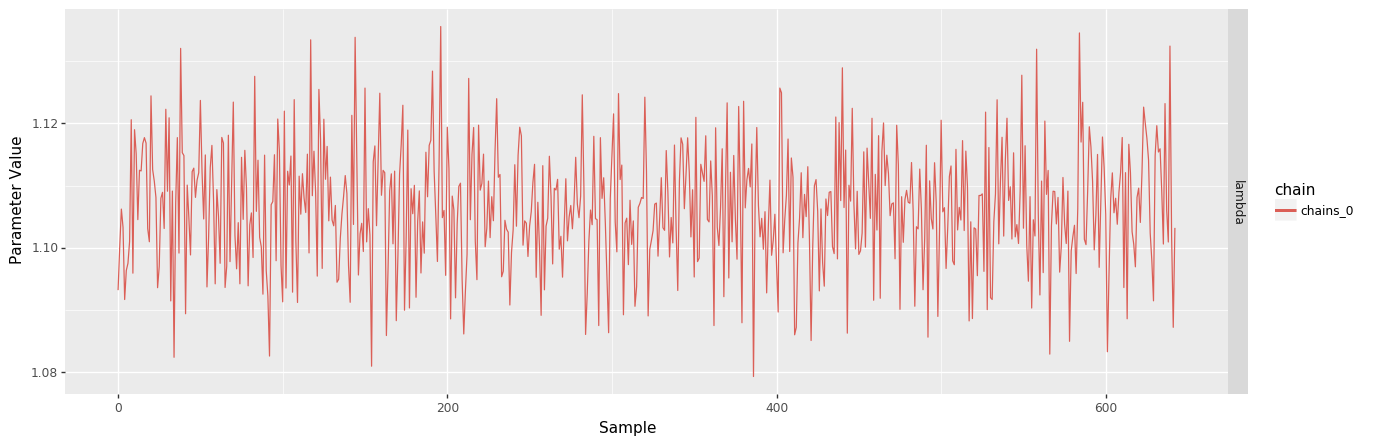

<ggplot: (-9223372036437170856)>


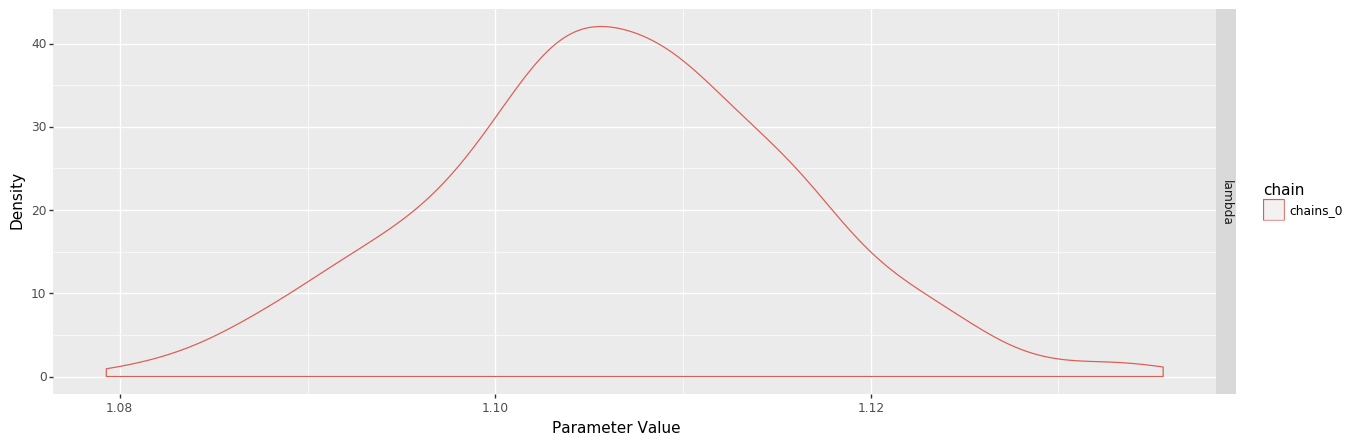

<ggplot: (417711508)>
None
The effective sampe size across our 1 chains are 643.0
The average scale reduction (R) is nan


,mean_parameter,mode_parameter,std_dev_parameter,5_percentile,95_percentile,n_eff,R
0,1.106397,1.108,0.009685,1.09,1.1229,643.0,NaN


In [6]:
# Diagnostics for lambda_1
mcmc.mcmc_diagnostics(lambdas[:,1].reshape(1,n_iter-burn_in), 
                      thin = 7,
                      srf_details=False,
                      plot_1_acf = True, 
                      plot_m_c_trace = True)

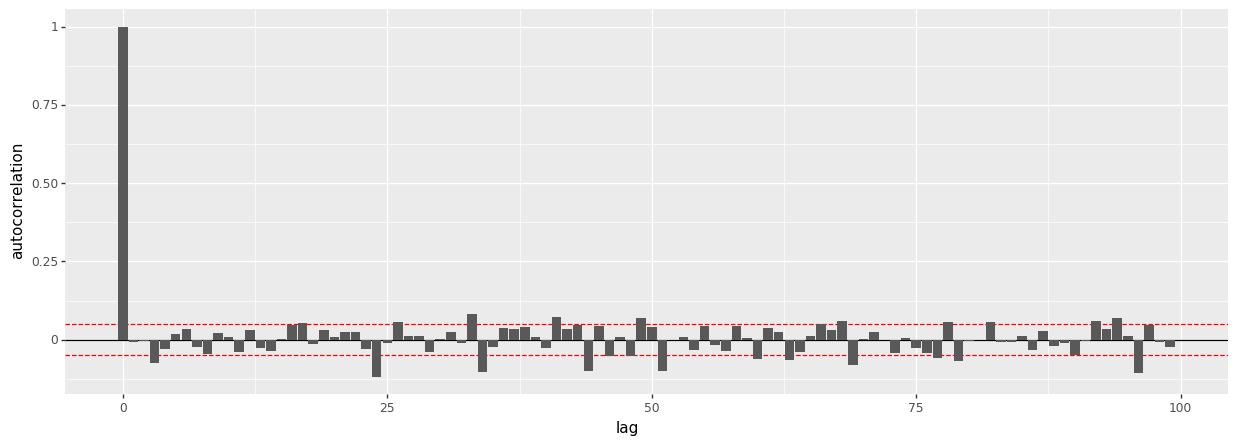

<ggplot: (417752510)>


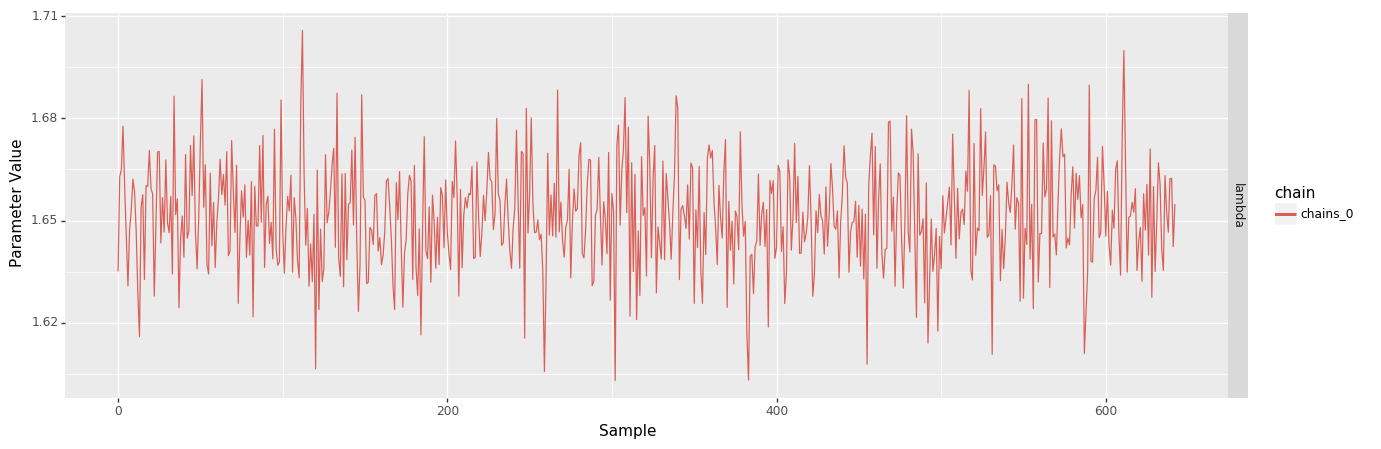

<ggplot: (-9223372036436965937)>


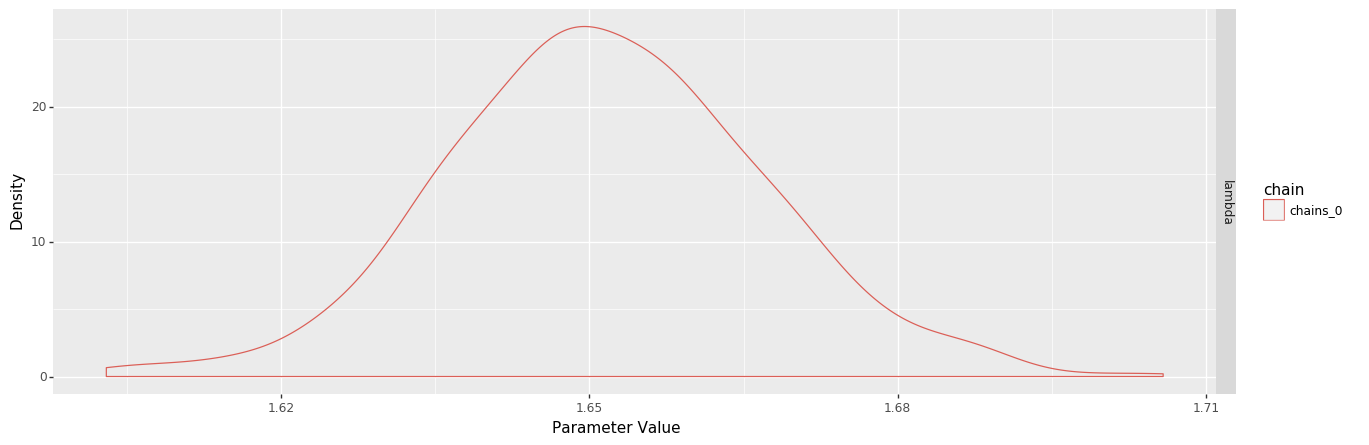

<ggplot: (-9223372036437001314)>
None
The effective sampe size across our 1 chains are 643.0
The average scale reduction (R) is nan


,mean_parameter,mode_parameter,std_dev_parameter,5_percentile,95_percentile,n_eff,R
0,1.651414,1.647,0.015475,1.627,1.677,643.0,NaN


In [7]:
# Diagnostics for lambda_2
mcmc.mcmc_diagnostics(lambdas[:,2].reshape(1,n_iter-burn_in), 
                      thin = 7,
                      srf_details=False,
                      plot_1_acf = True, 
                      plot_m_c_trace = True)

In [8]:
# We can calculate the coefficient values for beta in a similar way by taking the inverse transform
betas = np.log(lambdas)

In [9]:
# Diagnostics for beta_0
mcmc.mcmc_diagnostics(betas[:,0].reshape(1,n_iter-burn_in), 
                      thin = 7,   # thin=7
                      srf_details=False,
                      plot_1_acf = False, 
                      plot_m_c_trace = False)

The effective sampe size across our 1 chains are 643.0
The average scale reduction (R) is nan


,mean_parameter,mode_parameter,std_dev_parameter,5_percentile,95_percentile,n_eff,R
0,7.99783,7.998,0.008669,7.984,8.011,643.0,NaN


In [10]:
# Diagnostics for beta_1
mcmc.mcmc_diagnostics(betas[:,1].reshape(1,n_iter-burn_in), 
                      thin = 7,   # thin=7
                      srf_details=False,
                      plot_1_acf = False, 
                      plot_m_c_trace = False)

The effective sampe size across our 1 chains are 643.0
The average scale reduction (R) is nan


,mean_parameter,mode_parameter,std_dev_parameter,5_percentile,95_percentile,n_eff,R
0,0.101068,0.099,0.008714,0.086,0.1159,643.0,NaN


In [11]:
# Diagnostics for beta_2
mcmc.mcmc_diagnostics(betas[:,2].reshape(1,n_iter-burn_in), 
                      thin = 7,   # thin=7
                      srf_details=False,
                      plot_1_acf = False, 
                      plot_m_c_trace = False)

The effective sampe size across our 1 chains are 643.0
The average scale reduction (R) is nan


,mean_parameter,mode_parameter,std_dev_parameter,5_percentile,95_percentile,n_eff,R
0,0.501591,0.499,0.009385,0.4861,0.517,643.0,NaN
